## Importing all necessary libraries

In [12]:
import numpy as np
import scipy
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('expand_frame_repr', False)
import math
import random
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os

## Reading the data

In [14]:
local_path = os.getcwd()
shared_articles = local_path + "\\input\\shared_articles.csv"
shared_articles = pd.read_csv(shared_articles)
shared_articles = shared_articles[shared_articles['eventType'] == 'CONTENT SHARED'].copy().reset_index(drop=True)

users_interactions = local_path + "\\input\\users_interactions.csv"
users_interactions = pd.read_csv(users_interactions)

print("Shared Articles Dataset")
shared_articles.head()

Shared Articles Dataset


,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
2,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
3,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en
4,1459194522,CONTENT SHARED,-2826566343807132236,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.coindesk.com/ieee-blockchain-oxford...,IEEE to Talk Blockchain at Cloud Computing Oxf...,One of the largest and oldest organizations fo...,en


In [15]:
print("Users Interactions Dataset")
users_interactions.head()

Users Interactions Dataset


,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN


## Setting the Event Type Strength

In [20]:
event_type_strength = {
   'VIEW': 1.0,
   'LIKE': 2.0, 
   'BOOKMARK': 3.0, 
   'FOLLOW': 4.0,
   'COMMENT CREATED': 5.0,  
}

users_interactions['eventStrength'] = users_interactions['eventType'].apply(lambda x: event_type_strength[x])

users_interactions[['personId', 'contentId', 'eventType', 'eventStrength']].head()


,personId,contentId,eventType,eventStrength
0,-8845298781299428018,-3499919498720038879,VIEW,1.0
1,-1032019229384696495,8890720798209849691,VIEW,1.0
2,-1130272294246983140,310515487419366995,VIEW,1.0
3,344280948527967603,310515487419366995,FOLLOW,4.0
4,-445337111692715325,-7820640624231356730,VIEW,1.0


In [ ]:
### FILTERING OFF DATASET THAT HAVE ATLEAST 5 ARTICLES READ BY A USER

users_interactions_count_df = users_interactions[['personId', 'contentId']].drop_duplicates().groupby(['personId']).size()
print('Sum of all articles read by users: %d' % len(users_interactions_count_df))
users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 5].reset_index()['personId'].to_list()
print('Sum of articles read by users with atleast 5 articles each: %d' % len(users_with_enough_interactions_df))

print('Total # of interactions: %d' % users_interactions.shape[0])
users_interactions = users_interactions[users_interactions['personId'].isin(users_with_enough_interactions_df)]
print('Total # of interactions: %d' % users_interactions.shape[0])

# Since one person can interact many ways for a content, let us aggregate all the eventStregth for a given 
# personId and contentId

interactions_full_df = users_interactions.groupby(['personId', 'contentId'])['eventStrength'].sum().reset_index()
interactions_full_df.groupby(pd.cut(interactions_full_df['eventStrength'], bins=6)).size()

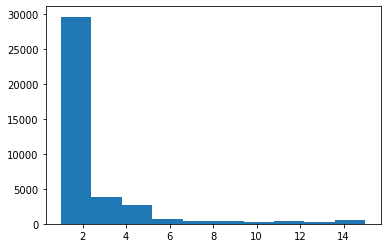

In [11]:
interactions_full_df['eventStrength'] = np.where(interactions_full_df['eventStrength'] > 15, 15, interactions_full_df['eventStrength'])
interactions_full_df.groupby(pd.cut(interactions_full_df['eventStrength'], bins=6)).size()
plt.hist(interactions_full_df['eventStrength'], bins=10)
plt.show()